In [1]:
try:
  # tensorflow_version only exists in colab
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

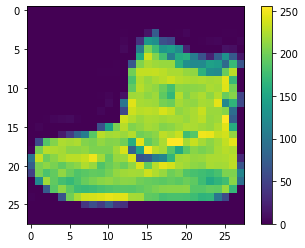

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

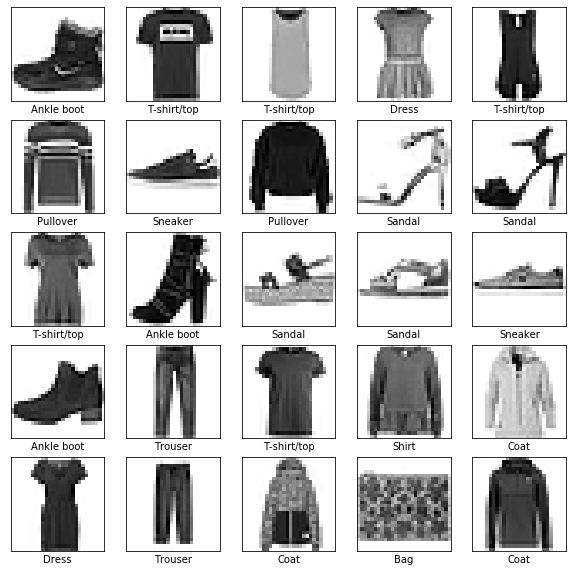

In [11]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4977 - accuracy: 0.8248
Epoch 2/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3722 - accuracy: 0.8663
Epoch 3/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3330 - accuracy: 0.8793
Epoch 4/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3099 - accuracy: 0.8868
Epoch 5/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2931 - accuracy: 0.8917
Epoch 6/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2777 - accuracy: 0.8973
Epoch 7/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2638 - accuracy: 0.9024
Epoch 8/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2556 - accuracy: 0.9051
Epoch 9/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2461 - accuracy: 0.9079
Epoch 10/20
60

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3593 - accuracy: 0.8886

Test accuracy: 0.8886


In [0]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([9.8485042e-10, 1.8700031e-15, 2.8823171e-13, 1.6751232e-10,
       2.7260801e-11, 8.5130532e-04, 9.7250712e-08, 4.2418428e-03,
       6.3621658e-10, 9.9490672e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

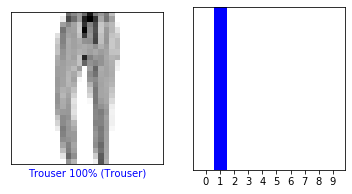

In [40]:
i = 80
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


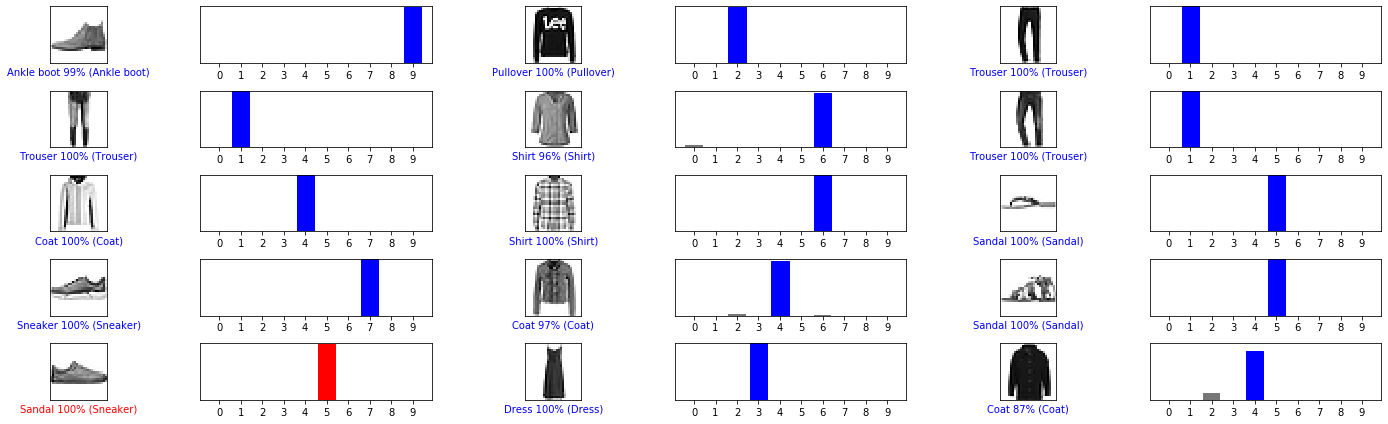

In [41]:


num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_rows, 2*num_cols))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [25]:
img = test_images[1]
print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.1757451e-04 7.3661814e-15 9.9712092e-01 1.8677201e-15 2.6523205e-03
  6.1215900e-11 1.0913144e-04 4.6018575e-14 7.8807857e-14 1.8052726e-20]]


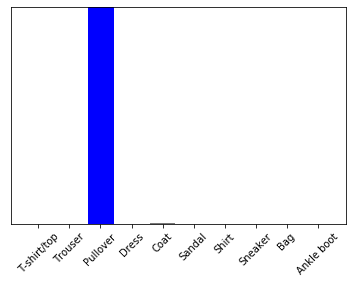

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
np.argmax(predictions_single[0])

2